# **Business Objective:** To predict if a song is popular given various features of the song.

In [8]:
import pip
pip.main(['install','sklearn'])


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting sklearn

Using cached sklearn-0.0.tar.gz (1.1 kB)

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Collecting scikit-learn

Downloading scikit_learn-1.1.1-cp310-cp310-macosx_12_0_arm64.whl (7.7 MB)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/r
ich/live.py:221: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Collecting threadpoolctl>=2.0.0

Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

Requirement already satisfied: scipy>=1.3.2 in /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages (from scikit-learn->sklearn) (1.8.0)

Requirement already satisfied: numpy>=1.17.3 in /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages (from scikit-learn->sklearn) (1.22.3)

Collecting joblib>=1.0.0

Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)

Building wheels for collected packages: sklearn

Building wheel for sklearn (setup.py): started

Building wheel for sklearn (setup.py): finished with status 'done'

Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=32e5a021b50ce080572377a38aeed95bf60b8a1550a29c5bc90cf3be130eb392

Stored in directory: /Users/a0b039g/Library/Caches/pip/wheels/9b/13/01/6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d

Successfully built sklearn

Installing collected packages: threadpoolctl, joblib, scikit-learn, sklearn

Successfully installed joblib-1.1.0 scikit-learn-1.1.1 sklearn-0.0 threadpoolctl-3.1.0

WARNING: There was an error checking the latest version of pip.


0

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,roc_curve,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


In [12]:
song_data=pd.read_csv('../data/raw/train.csv')
song_data.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [13]:
song_data=song_data.drop('id',axis=1)
song_data.shape

(30000, 14)

In [14]:
song_data['song_popularity'].value_counts()/song_data.shape[0]

0    0.6356
1    0.3644
Name: song_popularity, dtype: float64

# **EDA**

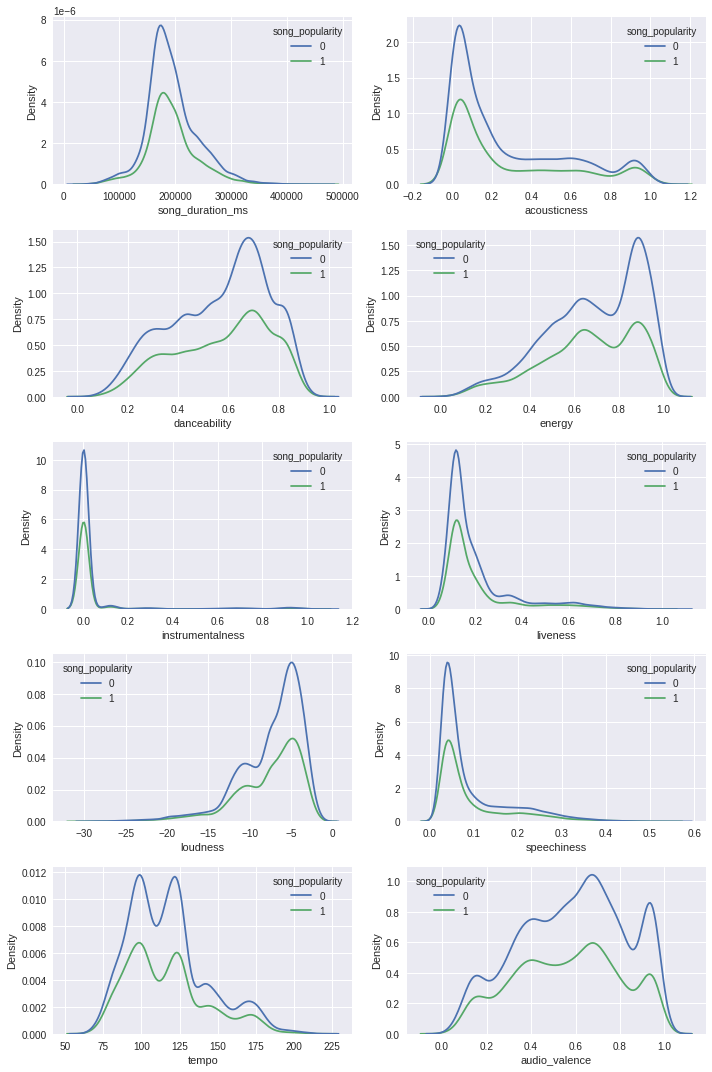

In [ ]:
#Plotting the density graphs of the target variable with respect to predictors.
#It wil help undertand the underlying distribution of target variable

num_cols = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']
 
fig, axs = plt.subplots( nrows=5, ncols=2, figsize=(10, 15) )
 
for idx, num_col in enumerate( num_cols ):
    sns.kdeplot( data=song_data, x=num_col, hue='song_popularity', multiple='layer', ax=axs[int(idx/2),idx%2] )
        
fig.tight_layout( )
plt.show( )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faefbb304d0>,
      dtype=object)

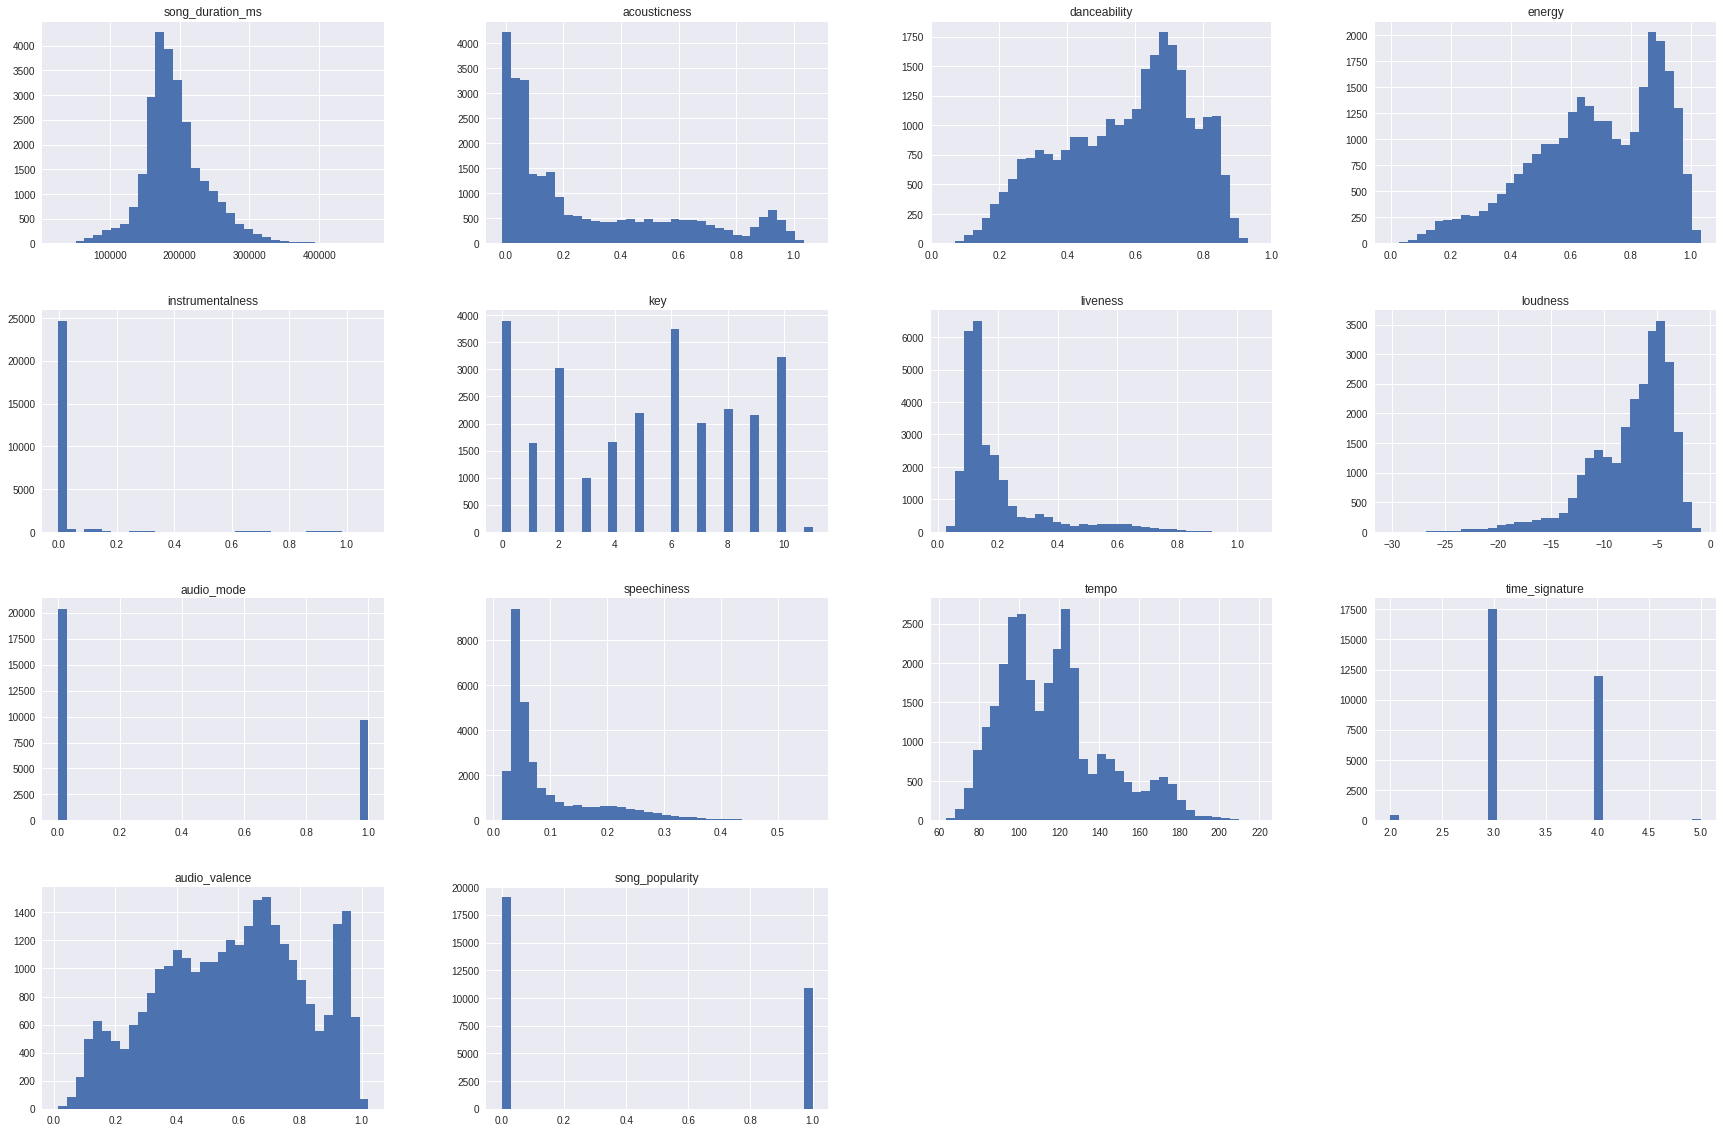

In [ ]:
song_data.hist(bins=35,figsize=(30,20))

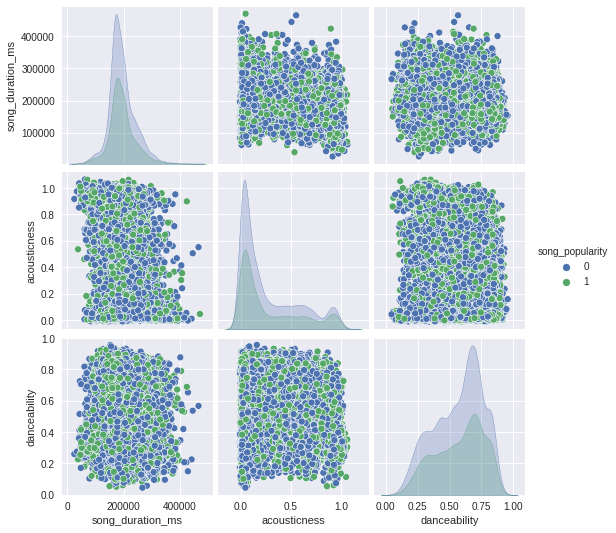

In [ ]:
cols_needed = ['song_duration_ms', 'acousticness', 'danceability','song_popularity']
sns.pairplot(data=song_data[cols_needed], hue="song_popularity") 

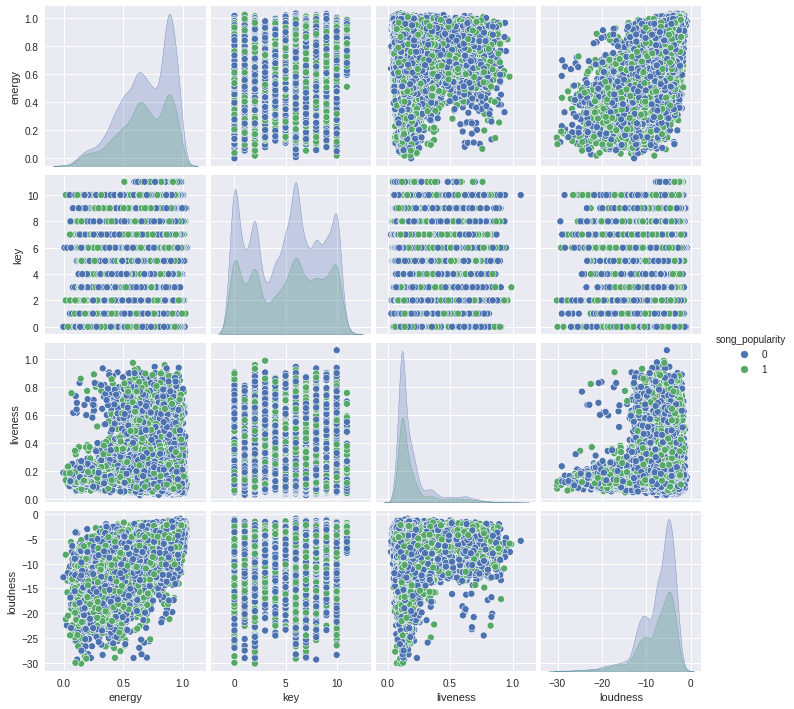

In [ ]:
cols_needed = [ 'energy', 'key', 'liveness', 'loudness','song_popularity']
sns.pairplot(data=song_data[cols_needed], hue="song_popularity") 

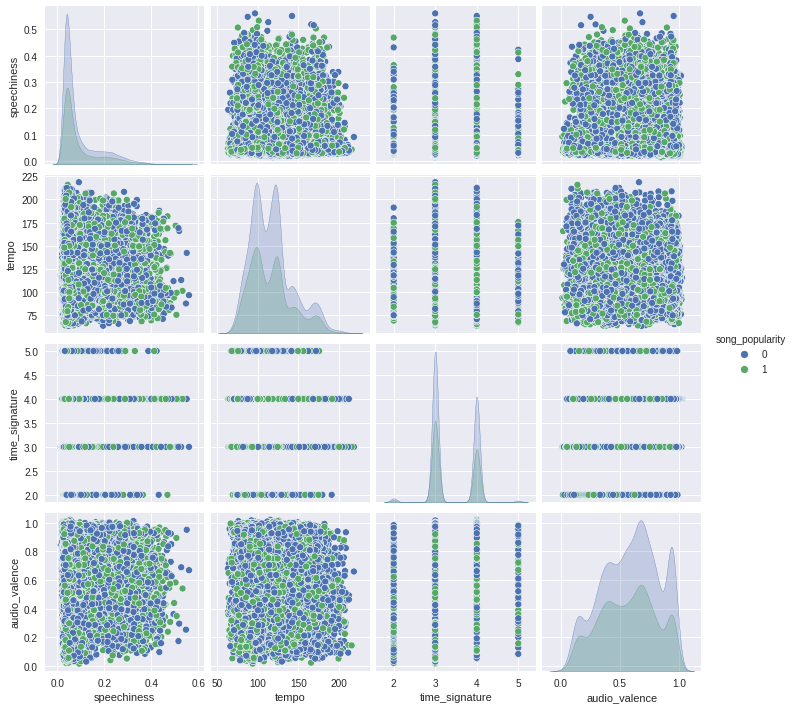

In [ ]:
cols_needed = [ 'speechiness', 'tempo', 'time_signature', 'audio_valence','song_popularity']
sns.pairplot(data=song_data[cols_needed], hue="song_popularity") 

In [ ]:
song_data.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,30000.000000,26933.000000,26976.000000,27033.000000,27065.000000,27034.000000,26926.000000,26978.000000,27023.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,14999.500000,193309.698660,0.277219,0.571056,0.683746,0.036184,5.044752,0.198926,-7.418965,0.321167,0.093773,116.557754,3.393967,0.581015,0.36440
std,8660.398374,45713.675116,0.298704,0.189676,0.213314,0.149116,3.379665,0.151879,3.892481,0.466932,0.083474,26.188606,0.525198,0.237429,0.48127
min,0.000000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-30.170399,0.000000,0.015065,63.478876,2.000000,0.013398,0.00000
25%,7499.750000,166492.000000,0.039530,0.425141,0.538968,0.000952,2.000000,0.111956,-9.586576,0.000000,0.038421,97.000171,3.000000,0.398907,0.00000
50%,14999.500000,186908.000000,0.140486,0.607879,0.705028,0.001967,6.000000,0.136253,-6.356886,0.000000,0.055611,113.795116,3.000000,0.599059,0.00000
75%,22499.250000,215039.000000,0.484065,0.718443,0.870518,0.003226,8.000000,0.213505,-4.618818,1.000000,0.117877,128.497863,4.000000,0.760160,1.00000
max,29999.000000,470577.000000,1.065284,0.957131,1.033434,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,218.637439,5.000000,1.022283,1.00000


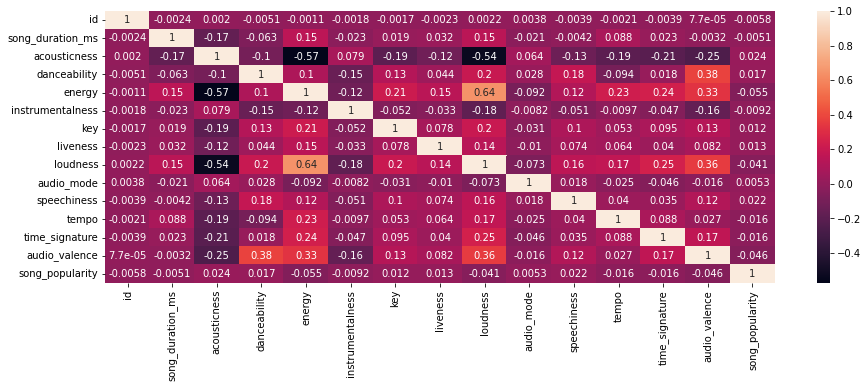

In [ ]:
# Correlation Matrix
fig_dims=(15,5)
fig_ax=plt.subplots(figsize=fig_dims)
corr_matrix=song_data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

### From the correlation matrix it can be seen that none of the predictors have a strong correlation with the target variable. Predictors 'energy' and 'loudness' have a correlation coefficient of 0.64

In [ ]:
corr_matrix["song_popularity"].sort_values(ascending=False)

song_popularity     1.000000
acousticness        0.024227
speechiness         0.021719
is_lively           0.020290
danceability        0.017010
liveness            0.013361
key                 0.012392
audio_mode          0.005341
song_duration_ms   -0.005150
instrumentalness   -0.009160
tempo              -0.016447
time_signature     -0.016464
high_energy        -0.025985
is_loud            -0.029485
loudness           -0.040986
audio_valence      -0.046232
energy             -0.055065
Name: song_popularity, dtype: float64

# Making a copy of data

In [15]:
song_data_copy=song_data.copy()
song_data_copy.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [16]:
song_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  26933 non-null  float64
 1   acousticness      26976 non-null  float64
 2   danceability      27033 non-null  float64
 3   energy            27065 non-null  float64
 4   instrumentalness  27034 non-null  float64
 5   key               26926 non-null  float64
 6   liveness          26978 non-null  float64
 7   loudness          27023 non-null  float64
 8   audio_mode        30000 non-null  int64  
 9   speechiness       30000 non-null  float64
 10  tempo             30000 non-null  float64
 11  time_signature    30000 non-null  int64  
 12  audio_valence     30000 non-null  float64
 13  song_popularity   30000 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 3.2 MB


# **Stratified Splitting of Data**

**Train-test Split:** The class labels are not balanced in the dataset. Class 0 and Class 1 have 64% and 36% distribution in the data respectively. To maintain the same ratio in train and test data, stratified split on the target variable 'song_popularity' is applied.

In [17]:
train, test = train_test_split(song_data_copy, test_size = 0.25, random_state = 42, stratify = song_data_copy["song_popularity"])

In [18]:
train.shape

(22500, 14)

In [19]:
test.shape

(7500, 14)

In [20]:
train['song_popularity'].value_counts()/train.shape[0]

0    0.6356
1    0.3644
Name: song_popularity, dtype: float64

In [21]:
test['song_popularity'].value_counts()/test.shape[0]

0    0.6356
1    0.3644
Name: song_popularity, dtype: float64

# **Creating Functions and Pipelines for Data Formatting**

In [22]:
def categorical_numerical_columns(data):
  cat_cols=[]
  num_cols=[]

  #Coverting key, audio_mode, time_signature,song_popularity into categorical columns
  data['key']=pd.Categorical(data['key'])
  data['audio_mode']=pd.Categorical(data['audio_mode'])
  data['time_signature']=pd.Categorical(data['time_signature'])

  data['song_popularity']=pd.Categorical(data['song_popularity'])

  cat_cols=list(data.select_dtypes(include='category').columns.difference({'song_popularity'}))
  num_cols=list(data.select_dtypes(exclude='category').columns)

  return cat_cols, num_cols

In [23]:
def prepare_data(train,test,categorical_cols,numerical_cols):
  X_train=train.drop('song_popularity',axis=1)
  y_train=train['song_popularity'].copy()

  X_test=test.drop('song_popularity',axis=1)
  y_test=test['song_popularity'].copy()

  param_grid = {
    'n_neighbors': [1,3,5],
  }

  num_pipeline=Pipeline([('knn_impute',KNNImputer(n_neighbors=3)),
                         ('scaler',StandardScaler())])
  num_pipeline_noscale=Pipeline([('knn_impute',KNNImputer(n_neighbors=3))])


  cat_pipeline=Pipeline([('cat_impute',SimpleImputer(strategy='most_frequent')),
                         ('encoder',OneHotEncoder())])
  cat_pipeline_noencoder=Pipeline([('cat_impute',SimpleImputer(strategy='most_frequent'))])

  full_pipeline=ColumnTransformer([
                                   ('num',num_pipeline,numerical_cols),
                                   ('cat',cat_pipeline,categorical_cols)
  ])
  full_pipeline_onlyimpute=ColumnTransformer([
                                   ('num',num_pipeline_noscale,numerical_cols),
                                   ('cat',cat_pipeline_noencoder,categorical_cols)
  ])

  X_train_imputed_scaled=full_pipeline.fit_transform(X_train)
  X_train_imputed=full_pipeline_onlyimpute.fit_transform(X_train)

  X_test_imputed_scaled=full_pipeline.transform(X_test)
  X_test_imputed=full_pipeline_onlyimpute.transform(X_test)


  return X_train_imputed_scaled,y_train,X_test_imputed_scaled,y_test,X_train_imputed,X_test_imputed
  

In [24]:
categorical_cols,numerical_cols=categorical_numerical_columns(song_data_copy)
print("Categorical columns", categorical_cols)
print("Numerical columns", numerical_cols)

Categorical columns ['audio_mode', 'key', 'time_signature']
Numerical columns ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


In [25]:
X_train_imputed_scaled,y_train,X_test_imputed_scaled,y_test,X_train_imputed,X_test_imputed=prepare_data(train,test,categorical_cols,numerical_cols)

In [26]:
X_train_imputed_scaled.shape

(22500, 28)

In [27]:
y_train.shape

(22500,)

In [28]:
X_test_imputed_scaled.shape

(7500, 28)

In [29]:
y_test.shape

(7500,)

In [30]:
X_train_imputed.shape

(22500, 13)

In [31]:
X_test_imputed.shape

(7500, 13)

# ***Random Forest***

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
w={0:36,1:64}
rf=RandomForestClassifier(max_depth=3,oob_score=True,class_weight=w,random_state=42)
rf.fit(X_train_imputed,y_train)

RandomForestClassifier(class_weight={0: 36, 1: 64}, max_depth=3, oob_score=True,
                       random_state=42)

In [34]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train_imputed, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
scores

array([0.56601384, 0.57021747, 0.54714225, 0.57035306, 0.56252942,
       0.5754409 , 0.57052618, 0.53026096, 0.54680624, 0.56299676,
       0.54490784, 0.55502644, 0.55639519, 0.54927426, 0.56864489,
       0.57008741, 0.57301296, 0.55965206, 0.5791796 , 0.55585323,
       0.55309308, 0.54518079, 0.5835562 , 0.55926275, 0.54183865,
       0.55339502, 0.56929047, 0.57643101, 0.5493169 , 0.56688044])

In [39]:
y_pred=rf.predict(X_test_imputed)

In [40]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.5096
Confusion Matrix: 
[[2087 2680]
 [ 998 1735]]
Area Under Curve: 0.5363175343107354
F1 Score: 0.4854504756575265
Precision Score: 0.3929784824462061
Recall Score: 0.6348335162824734


In [37]:
col_names=[numerical_cols,categorical_cols]
features_flat_list = [item for sublist in col_names for item in sublist]
features_flat_list

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'audio_valence',
 'audio_mode',
 'key',
 'time_signature']

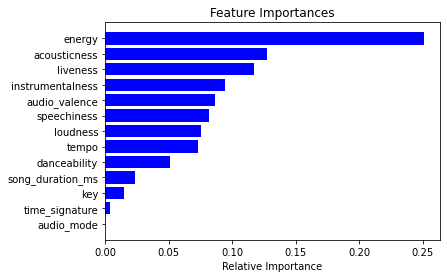

In [41]:
#Feature Importance plot
features = features_flat_list
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()